# Run this notebook after running "Crime_EDA_K" and "HousingData_EDA_K"

In [80]:
#initial imports
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy import stats

In [81]:
#import cleaned df 
housing_df = pd.read_csv('Resources/HousingData_clean.csv', index_col = [0])
crime_df = pd.read_csv('Resources/2018To2021CrimeData_clean.csv', index_col = [0])

In [82]:
#preview housing df 
housing_df.head()

,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,hasAssociation,homeType,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,lotSizeSqFt,livingAreaSqFt
0,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,True,Single Family,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",6011.0,2601.0
1,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,True,Single Family,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,6185.0,1768.0
2,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,True,Single Family,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,7840.0,1478.0
3,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,True,Single Family,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,6098.0,1678.0
4,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,True,Single Family,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,6708.0,2132.0


In [83]:
#create an hour column for the ocurred time
crime_df['hour'] = pd.DatetimeIndex(crime_df['Occurred_Date_Time']).hour

In [84]:
#preview crime df 
crime_df.head()

,Incident_Number,Highest_Offense_Description,Highest_Offense_Code,Family_Violence,Occurred_Date_Time,Occurred_Date,Occurred_Time,Report_Date_Time,Report_Date,Report_Time,...,Clearance_Date,UCR_Category,Category_Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year,hour
1,20195014472,BURGLARY OF VEHICLE,601,N,2019-04-08 22:00:00,2019-04-08,1970-01-01 00:00:00.000002200,2019-04-09 13:09:00,2019-04-09,1970-01-01 00:00:00.000001309,...,04/09/2019,23F,Theft,3119486.0,3119486.0,30.292247,-97.725763,"(30.29224653, -97.72576272)",2019.0,22
5,20191561862,POSSESSION OF MARIJUANA,1803,N,2019-06-05 22:35:00,2019-06-05,1970-01-01 00:00:00.000002235,2019-06-05 22:35:00,2019-06-05,1970-01-01 00:00:00.000002235,...,01/01/1888,0,None,3108421.0,3108421.0,30.193941,-97.763449,"(30.19394123, -97.76344868)",2019.0,22
6,20191511203,EVADING / FOOT,2723,N,2019-05-31 14:58:00,2019-05-31,1970-01-01 00:00:00.000001458,2019-05-31 14:58:00,2019-05-31,1970-01-01 00:00:00.000001458,...,06/04/2019,0,None,3099373.0,3099373.0,30.225732,-97.791259,"(30.22573152, -97.79125883)",2019.0,14
7,2019990714,BURGLARY OF RESIDENCE,500,N,2019-04-09 12:06:00,2019-04-09,1970-01-01 00:00:00.000001206,2019-04-09 12:06:00,2019-04-09,1970-01-01 00:00:00.000001206,...,06/04/2019,220,Burglary,3111980.0,3111980.0,30.201607,-97.751976,"(30.2016066, -97.75197579)",2019.0,12
10,20191561277,POSS CONTROLLED SUB/NARCOTIC,1800,N,2019-06-05 17:53:00,2019-06-05,1970-01-01 00:00:00.000001753,2019-06-05 17:53:00,2019-06-05,1970-01-01 00:00:00.000001753,...,06/07/2019,0,None,3179352.0,3179352.0,30.349163,-97.534373,"(30.3491627, -97.5343733)",2019.0,17


# Merge crime and housing data sets by zipcode

In [85]:
#change crime_df zipcode column to match housing_df
crime_df.rename(columns = {'Zip_Code':'zipcode'}, inplace = True)

In [86]:
#change zipcode in crime_df from float to int 
crime_df['zipcode'] = crime_df['zipcode'].astype(int)

In [87]:
#group crime_df on zipcodes
group_df = crime_df.groupby(by = crime_df['zipcode'])

In [88]:
#get the count of occurances by zipcode
group_df2 = group_df.count()

In [89]:
#preview grouped df 
group_df2.head()

,Incident_Number,Highest_Offense_Description,Highest_Offense_Code,Family_Violence,Occurred_Date_Time,Occurred_Date,Occurred_Time,Report_Date_Time,Report_Date,Report_Time,...,Clearance_Date,UCR_Category,Category_Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year,hour
zipcode,,,,,,,,,,,,,,,,,,,,,
78610,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
78612,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
78613,1963,1963,1963,1963,1963,1963,1963,1963,1963,1963,...,1963,1963,1963,1963,1963,1940,1940,1940,1963,1963
78616,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
78617,3497,3497,3497,3497,3497,3497,3497,3497,3497,3497,...,3497,3497,3497,3497,3497,3417,3417,3417,3497,3497


# Percent Increase in Property Value per year 

In [40]:
# price = housing_df.groupby(['zipcode','latest_saleyear']).agg("mean")
# price = price['latestPrice']
# price

In [41]:
# price_avg = housing_df.pivot_table(index='zipcode', columns='latest_saleyear', values=['latestPrice'], aggfunc='mean')
# #price_avg.loc[:,"2018"]

# price_avg.columns = price_avg.columns.droplevel(0) #remove amount
# price_avg.columns.name = None               #remove categories
# price_avg = price_avg.reset_index()                #index to columns
# #price_avg[[2018]]
# price_avg[[2018]] = price_avg[[2018]].fillna('0')
# price_avg[[2019]] = price_avg[[2019]].fillna('0')
# price_avg[[2020]] = price_avg[[2020]].fillna('0')
# price_avg[[2021]] = price_avg[[2021]].fillna('0')
# price_avg = price_avg.astype(int)
# price_avg["price_dif_18_19"] = ((price_avg[2019] - price_avg[2018])/ price_avg[2018])*100
# price_avg["price_dif_19_20"] = ((price_avg[2020] - price_avg[2019])/ price_avg[2019])*100
# price_avg["price_dif_20_21"] = ((price_avg[2021] - price_avg[2020])/ price_avg[2020])*100


# price_avg

In [42]:
#updated code for this section

In [43]:
#need to use cleaned housing df
price = housing_df.groupby(['zipcode','latest_saleyear']).mean().unstack()
price = price[['latestPrice']]
price.head()

latestPrice                                        
latest_saleyear           2018           2019           2020      2021
zipcode                                                               
78617            193990.482759  200321.181818  198750.391304  137500.0
78619            650000.000000  743965.000000  784800.000000       NaN
78652                      NaN            NaN  375339.750000       NaN
78653                      NaN  369900.000000  297490.000000       NaN
78660            250109.625000  285695.416667  303125.250000       NaN

In [44]:
#format column headers
price.columns = price.columns.get_level_values(1)
price.columns.name = None 
price = price.reset_index()
price.head()

,zipcode,2018,2019,2020,2021
0,78617,193990.482759,200321.181818,198750.391304,137500.0
1,78619,650000.000000,743965.000000,784800.000000,NaN
2,78652,NaN,NaN,375339.750000,NaN
3,78653,NaN,369900.000000,297490.000000,NaN
4,78660,250109.625000,285695.416667,303125.250000,NaN


In [45]:
#fill NaN with 0
price = price.fillna(0)
price.head()

,zipcode,2018,2019,2020,2021
0,78617,193990.482759,200321.181818,198750.391304,137500.0
1,78619,650000.000000,743965.000000,784800.000000,0.0
2,78652,0.000000,0.000000,375339.750000,0.0
3,78653,0.000000,369900.000000,297490.000000,0.0
4,78660,250109.625000,285695.416667,303125.250000,0.0


In [46]:
#percent increase/decrease calculation
price['price_diff_18_19'] = round(((price[2019] - price[2018])/price[2018])*100,0)
price['price_diff_19_20'] = round(((price[2020] - price[2019])/price[2019])*100,0)
price['price_diff_20_21'] = round(((price[2021] - price[2020])/price[2020])*100,0)
price.head()

,zipcode,2018,2019,2020,2021,price_diff_18_19,price_diff_19_20,price_diff_20_21
0,78617,193990.482759,200321.181818,198750.391304,137500.0,3.0,-1.0,-31.0
1,78619,650000.000000,743965.000000,784800.000000,0.0,14.0,5.0,-100.0
2,78652,0.000000,0.000000,375339.750000,0.0,NaN,inf,-100.0
3,78653,0.000000,369900.000000,297490.000000,0.0,inf,-20.0,-100.0
4,78660,250109.625000,285695.416667,303125.250000,0.0,14.0,6.0,-100.0


In [47]:
# fill Nan and inf with 0
price = price.fillna(0)
price = price.replace([np.inf, -np.inf], 0)
price.head()

,zipcode,2018,2019,2020,2021,price_diff_18_19,price_diff_19_20,price_diff_20_21
0,78617,193990.482759,200321.181818,198750.391304,137500.0,3.0,-1.0,-31.0
1,78619,650000.000000,743965.000000,784800.000000,0.0,14.0,5.0,-100.0
2,78652,0.000000,0.000000,375339.750000,0.0,0.0,0.0,-100.0
3,78653,0.000000,369900.000000,297490.000000,0.0,0.0,-20.0,-100.0
4,78660,250109.625000,285695.416667,303125.250000,0.0,14.0,6.0,-100.0


In [48]:
#filter for years zip code and percent increase/decrease
price_diff = price[['zipcode', 'price_diff_18_19', 'price_diff_19_20', 'price_diff_20_21']]
price_diff.head()

,zipcode,price_diff_18_19,price_diff_19_20,price_diff_20_21
0,78617,3.0,-1.0,-31.0
1,78619,14.0,5.0,-100.0
2,78652,0.0,0.0,-100.0
3,78653,0.0,-20.0,-100.0
4,78660,14.0,6.0,-100.0


# Percent Difference in Crime 

In [49]:
#group by zip code and year; count and unstack
#need to use clead crime df
#looks like your already group by above - maybe use that insead?
crime = crime_df.groupby(['zipcode','year']).count().unstack()
crime = crime[['Incident_Number']]
crime.head()

Incident_Number                     
year             2018.0 2019.0 2020.0 2021.0
zipcode                                     
78610               3.0   10.0    9.0    2.0
78612               1.0    1.0    NaN    NaN
78613             563.0  518.0  423.0  459.0
78616               NaN    NaN    1.0    NaN
78617             901.0  894.0  808.0  894.0

In [50]:
#format column headers
crime.columns = crime.columns.get_level_values(1)
crime.columns.name = None 
crime = crime.reset_index()
crime.head()

,zipcode,2018.0,2019.0,2020.0,2021.0
0,78610,3.0,10.0,9.0,2.0
1,78612,1.0,1.0,NaN,NaN
2,78613,563.0,518.0,423.0,459.0
3,78616,NaN,NaN,1.0,NaN
4,78617,901.0,894.0,808.0,894.0


In [51]:
#fill NaN with 0
crime = crime.fillna(0)
crime.head()

,zipcode,2018.0,2019.0,2020.0,2021.0
0,78610,3.0,10.0,9.0,2.0
1,78612,1.0,1.0,0.0,0.0
2,78613,563.0,518.0,423.0,459.0
3,78616,0.0,0.0,1.0,0.0
4,78617,901.0,894.0,808.0,894.0


In [52]:
#percent increase/decrease calculation
crime['crime_diff_18_19'] = round(((crime[2019] - crime[2018])/crime[2018])*100,0)
crime['crime_diff_19_20'] = round(((crime[2020] - crime[2019])/crime[2019])*100,0)
crime['crime_diff_20_21'] = round(((crime[2021] - crime[2020])/crime[2020])*100,0)
crime.head()

,zipcode,2018.0,2019.0,2020.0,2021.0,crime_diff_18_19,crime_diff_19_20,crime_diff_20_21
0,78610,3.0,10.0,9.0,2.0,233.0,-10.0,-78.0
1,78612,1.0,1.0,0.0,0.0,0.0,-100.0,NaN
2,78613,563.0,518.0,423.0,459.0,-8.0,-18.0,9.0
3,78616,0.0,0.0,1.0,0.0,NaN,inf,-100.0
4,78617,901.0,894.0,808.0,894.0,-1.0,-10.0,11.0


In [53]:
# fill Nan and inf with 0
crime = crime.fillna(0)
crime = crime.replace([np.inf, -np.inf], 0)
crime.head()

,zipcode,2018.0,2019.0,2020.0,2021.0,crime_diff_18_19,crime_diff_19_20,crime_diff_20_21
0,78610,3.0,10.0,9.0,2.0,233.0,-10.0,-78.0
1,78612,1.0,1.0,0.0,0.0,0.0,-100.0,0.0
2,78613,563.0,518.0,423.0,459.0,-8.0,-18.0,9.0
3,78616,0.0,0.0,1.0,0.0,0.0,0.0,-100.0
4,78617,901.0,894.0,808.0,894.0,-1.0,-10.0,11.0


In [54]:
#filter for years zip code and percent increase/decrease
crime_diff = crime[['zipcode', 'crime_diff_18_19', 'crime_diff_19_20', 'crime_diff_20_21']]

# Percent Difference Housing and Crime - Graphs

In [55]:
#merge dataset for graphing
price_crime = pd.merge(price_diff, crime_diff, how='inner', on='zipcode')

In [56]:
#create variables for zip code and for each year
price_crime_18_19 = price_crime[['zipcode', 'price_diff_18_19', 'crime_diff_18_19']]
price_crime_19_20 = price_crime[['zipcode', 'price_diff_19_20', 'crime_diff_19_20']]
price_crime_20_21 = price_crime[['zipcode', 'price_diff_20_21', 'crime_diff_20_21']]

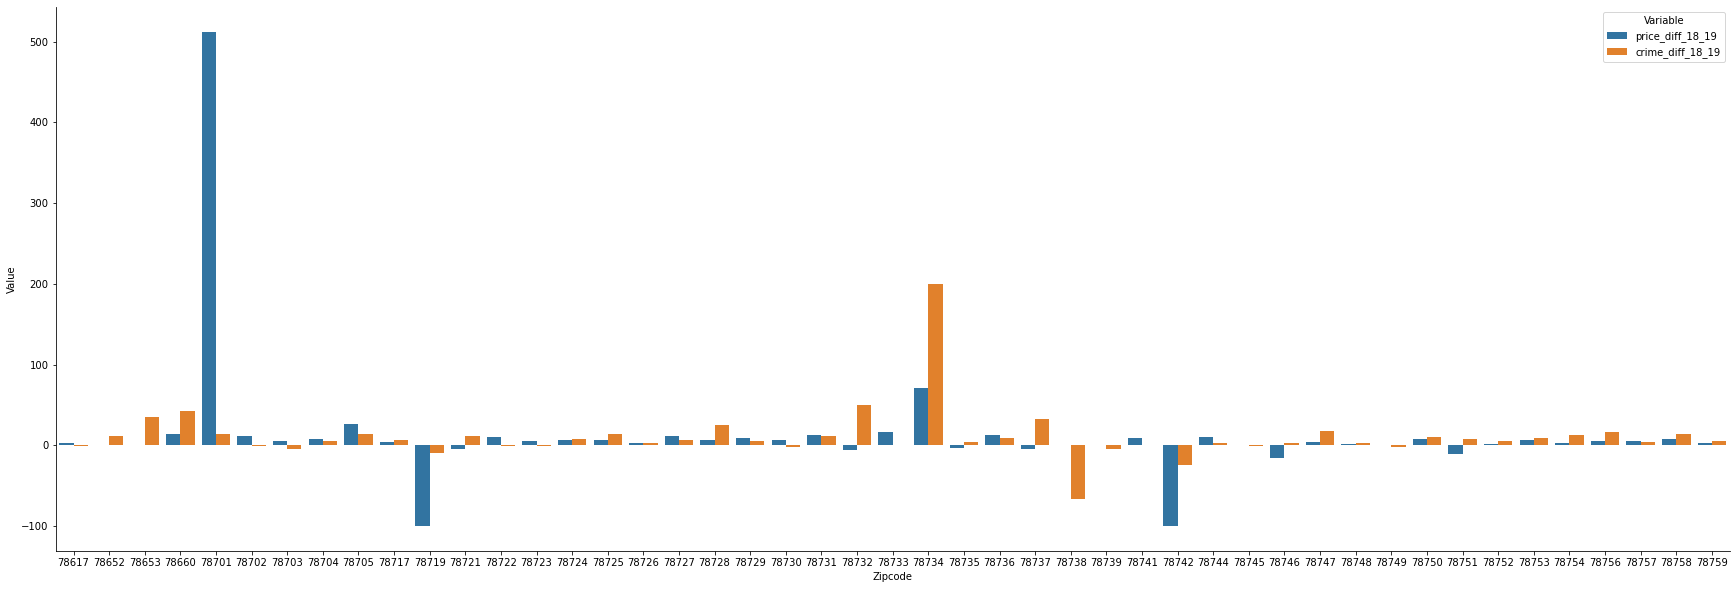

In [57]:
# plot with seaborn barplot
fig, ax1 = plt.subplots(figsize=(30, 10))
tidy = price_crime_18_19.melt(id_vars='zipcode').rename(columns=str.title)
sns.barplot(x='Zipcode', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
# fig.savefig('18_19.png')

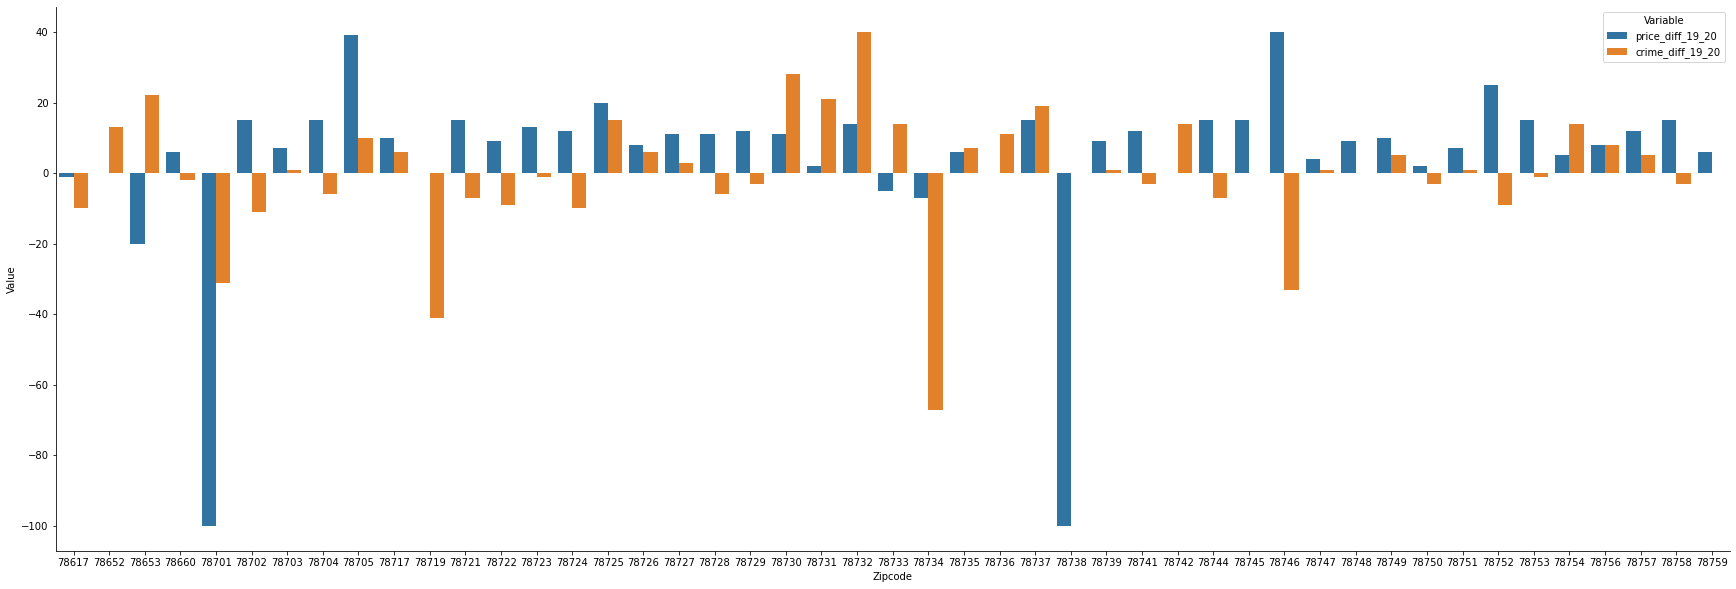

In [58]:
fig, ax1 = plt.subplots(figsize=(30, 10))
tidy = price_crime_19_20.melt(id_vars='zipcode').rename(columns=str.title)
sns.barplot(x='Zipcode', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
# fig.savefig('19_20.png')

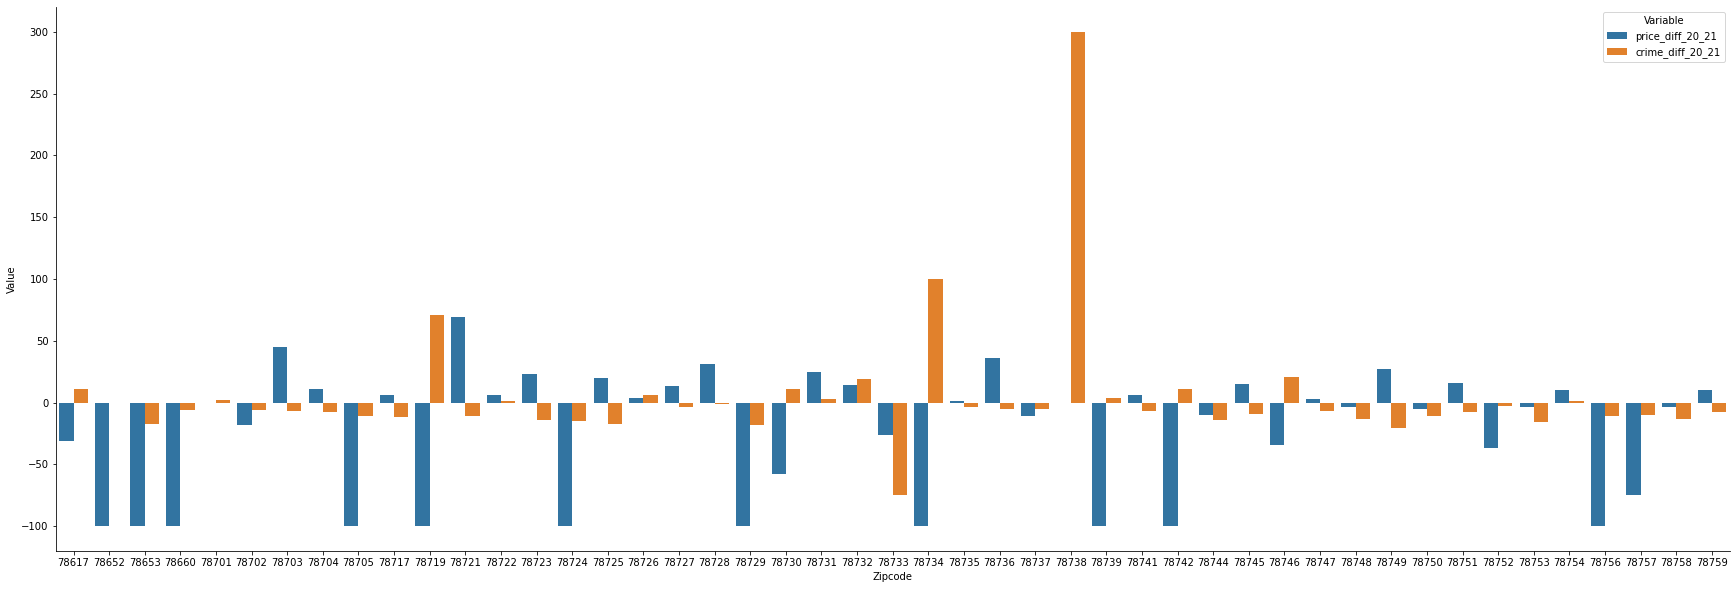

In [59]:
fig, ax1 = plt.subplots(figsize=(30, 10))
tidy = price_crime_20_21.melt(id_vars='zipcode').rename(columns=str.title)
sns.barplot(x='Zipcode', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
# fig.savefig('20_21.png')

# One sample t-test 

In [60]:
#two sample t-test for crime/housing increase/decrease 2018-2019
group1 = price_crime['crime_diff_18_19'].to_list()
group2 = price_crime['price_diff_18_19'].to_list()

#perform two sample t-test with equal variances
stats.ttest_ind(a=group1, b=group2, equal_var=True)

Ttest_indResult(statistic=-0.14577324746030282, pvalue=0.8844193148478827)

In [61]:
#two sample t-test for crime/housing increase/decrease 2019-2020
group3 = price_crime['crime_diff_19_20'].to_list()
group4 = price_crime['price_diff_19_20'].to_list()

#perform two sample t-test with equal variances
stats.ttest_ind(a=group3, b=group4, equal_var=True)

Ttest_indResult(statistic=-1.0927929695773393, pvalue=0.2773379921756531)

In [62]:
#two sample t-test for crime/housing increase/decrease 2020-2021
group5 = price_crime['crime_diff_20_21'].to_list()
group6 = price_crime['price_diff_20_21'].to_list()

#perform two sample t-test with equal variances
stats.ttest_ind(a=group5, b=group6, equal_var=True)

Ttest_indResult(statistic=2.4801684836876587, pvalue=0.014951037861486428)

# Machine Learning Model

In [64]:
df_final = pd.read_csv('Resources/HousingData_cont.csv', index_col = [0])

In [65]:
merge_final = pd.merge(df_final, group_df2[['Incident_Number','hour']], on ='zipcode',how = 'left')
merge_final = merge_final.rename(columns={"Incident_Number": "Count_Crimes"})
merge_final

,zipcode,propertyTaxRate,garageSpaces,parkingSpaces,latestPrice,numPriceChanges,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,...,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfBedrooms.1,numOfStories,Count_Crimes,hour
0,78660,1.98,2,2,305000.0,5,0,5,2,1,...,1.266667,2.666667,1063,14,3.0,4,4,2,3040.0,3040.0
1,78660,1.98,2,2,295000.0,1,0,1,2,0,...,1.400000,2.666667,1063,14,2.0,4,4,1,3040.0,3040.0
2,78660,1.98,0,0,256125.0,1,0,4,1,0,...,1.200000,3.000000,1108,14,2.0,3,3,1,3040.0,3040.0
3,78660,1.98,2,2,240000.0,4,0,0,2,0,...,1.400000,2.666667,1063,14,2.0,3,3,1,3040.0,3040.0
4,78660,1.98,0,0,239900.0,3,0,0,1,0,...,1.133333,4.000000,1223,14,3.0,3,3,2,3040.0,3040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,78748,1.98,6,6,330000.0,1,0,3,2,4,...,0.900000,3.333333,1424,14,2.0,3,3,1,13701.0,13701.0
15167,78741,1.98,2,2,550000.0,1,1,5,2,2,...,1.900000,6.666667,1226,16,4.0,3,3,3,31907.0,31907.0
15168,78704,1.98,2,2,875000.0,7,0,3,3,0,...,0.800000,5.000000,889,13,3.0,3,3,2,26036.0,26036.0
15169,78722,1.98,0,0,420000.0,5,0,3,1,0,...,1.300000,6.666667,1057,15,2.0,4,4,1,3019.0,3019.0


In [66]:
#one hot encode zipcode 
one_hot = pd.get_dummies(merge_final['zipcode'], prefix='Zip')
df_zips = merge_final.join(one_hot)
df_zips

,zipcode,propertyTaxRate,garageSpaces,parkingSpaces,latestPrice,numPriceChanges,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,...,Zip_78749,Zip_78750,Zip_78751,Zip_78752,Zip_78753,Zip_78754,Zip_78756,Zip_78757,Zip_78758,Zip_78759
0,78660,1.98,2,2,305000.0,5,0,5,2,1,...,0,0,0,0,0,0,0,0,0,0
1,78660,1.98,2,2,295000.0,1,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,78660,1.98,0,0,256125.0,1,0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
3,78660,1.98,2,2,240000.0,4,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,78660,1.98,0,0,239900.0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,78748,1.98,6,6,330000.0,1,0,3,2,4,...,0,0,0,0,0,0,0,0,0,0
15167,78741,1.98,2,2,550000.0,1,1,5,2,2,...,0,0,0,0,0,0,0,0,0,0
15168,78704,1.98,2,2,875000.0,7,0,3,3,0,...,0,0,0,0,0,0,0,0,0,0
15169,78722,1.98,0,0,420000.0,5,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#pd.set_option('display.max_rows', None)
df_zips.dtypes

zipcode              int64
propertyTaxRate    float64
garageSpaces         int64
parkingSpaces        int64
latestPrice        float64
                    ...   
Zip_78754            uint8
Zip_78756            uint8
Zip_78757            uint8
Zip_78758            uint8
Zip_78759            uint8
Length: 79, dtype: object

In [68]:
# drop duplicates and columns with insignificant p-values 
df_zips = df_zips.drop(columns=['numOfBedrooms.1', 'numOfSecurityFeatures.1','garageSpaces',
                     'parkingSpaces','numOfAccessibilityFeatures','numOfAppliances',
                     'numOfSecurityFeatures','numOfWindowFeatures','lotSizeSqFt'])

In [69]:
#check for null values 
df_zips.isnull().sum(axis = 0)

zipcode                 0
propertyTaxRate         0
latestPrice             0
numPriceChanges         0
numOfParkingFeatures    0
                       ..
Zip_78754               0
Zip_78756               0
Zip_78757               0
Zip_78758               0
Zip_78759               0
Length: 70, dtype: int64

In [70]:
# fill null values with zero 
df_zips[["Count_Crimes","hour"]] = df_zips[["Count_Crimes","hour"]].fillna(0)

In [71]:
# defne features and target 
y = df_zips[["latestPrice"]]
X = df_zips.drop(["latestPrice","zipcode"], axis=1)
X

,propertyTaxRate,numPriceChanges,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfWaterfrontFeatures,numOfCommunityFeatures,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,...,Zip_78749,Zip_78750,Zip_78751,Zip_78752,Zip_78753,Zip_78754,Zip_78756,Zip_78757,Zip_78758,Zip_78759
0,1.98,5,2,1,0,0,2601.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.98,1,2,0,0,0,1768.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.98,1,1,0,0,0,1478.0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
3,1.98,4,2,0,0,0,1678.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.98,3,1,0,0,0,2132.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,1.98,1,2,4,0,0,1234.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
15167,1.98,1,2,2,0,0,1888.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
15168,1.98,7,3,0,0,0,1524.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
15169,1.98,5,1,0,0,0,6068.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# split data into train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [73]:
# create a standard scaler instance 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
# fit and transform standard scaler with training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# create model 
model_final = linear_model.LinearRegression()

In [76]:
#fit model 
model_final.fit(X_train,y_train)

LinearRegression()

In [77]:
# make predictions
y_pred = model_final.predict(X_test)
y_pred.shape

(3793, 1)

In [78]:
#getting column names into a list 
col_list = X.columns.values.tolist()
col_list[:0] = ['const']
len(col_list)

69

In [79]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary(xname=col_list))

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     220.2
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:31:37   Log-Likelihood:            -1.5868e+05
No. Observations:               11378   AIC:                         3.175e+05
Df Residuals:                   11312   BIC:                         3.180e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               